### Simple RNN

RNNs, and in this case, Simple RNN, are suitable for sequential data, like natural language, where the order of words matters.

They can capture dependencies in the input sequence, making them effective for tasks like sentiment analysis where the sentiment may be influenced by the context of preceding words.

However, for more complex tasks and to capture longer-term dependencies, more advanced architectures like LSTM or GRU are often preferred.

RNNs, including SimpleRNN, are sensitive to the distribution of classes. If one class dominates the dataset, the RNN might struggle to capture patterns from the minority class.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical
import numpy as np

delimiter = ','

# Read the data file
try:
    yelp_data = pd.read_csv('/Users/urvilatnekar/Downloads/final_df_3040_labels.csv', delimiter=delimiter)
except pd.errors.ParserError as e:
    print(f"Error reading the data file: {e}")

X = yelp_data['text']
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)

# Iterate over each aspect and build a model
for aspect in aspects:
    y = yelp_data[aspect]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Tokenize and pad sequences
    tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_train)
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

    max_length = max(len(seq) for seq in X_train_sequences)
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

    # Apply oversampling
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_padded, y_train)

    # Convert labels to one-hot encoding
    y_train_resampled_one_hot = to_categorical(y_train_resampled, num_classes=3)
    y_test_one_hot = to_categorical(y_test, num_classes=3)

    # Build the RNN model
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),
        SimpleRNN(50, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Use softmax for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with resampled data
    model.fit(X_train_resampled, y_train_resampled_one_hot, epochs=5, validation_data=(X_test_padded, y_test_one_hot))

    # Evaluate the model
    predictions = np.argmax(model.predict(X_test_padded), axis=1)
    print(f"\nClassification Report for {aspect}:")
    print(classification_report(np.argmax(y_test_one_hot, axis=1), predictions))
    print(f"Accuracy for {aspect}: {accuracy_score(np.argmax(y_test_one_hot, axis=1), predictions)}")


Epoch 1/5
159/159 [==============================] - 12s 76ms/step - loss: 1.0996 - accuracy: 0.3288 - val_loss: 1.0905 - val_accuracy: 0.6798
Epoch 2/5
159/159 [==============================] - 12s 76ms/step - loss: 1.0990 - accuracy: 0.3327 - val_loss: 1.1020 - val_accuracy: 0.1264
Epoch 3/5
159/159 [==============================] - 12s 75ms/step - loss: 1.0995 - accuracy: 0.3325 - val_loss: 1.0968 - val_accuracy: 0.1264
Epoch 4/5
159/159 [==============================] - 12s 75ms/step - loss: 1.0988 - accuracy: 0.3325 - val_loss: 1.1030 - val_accuracy: 0.1921
Epoch 5/5
20/20 [==============================] - 0s 14ms/step

Classification Report for Food Quality:
              precision    recall  f1-score   support

           0       0.19      1.00      0.32       117
           1       1.00      0.00      0.00       415
           2       0.00      0.00      0.00        77

    accuracy                           0.19       609
   macro avg       0.40      0.33      0.11       6

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98/98 [==============================] - 8s 78ms/step - loss: 1.1008 - accuracy: 0.3174 - val_loss: 1.0984 - val_accuracy: 0.4023
Epoch 2/5
98/98 [==============================] - 8s 80ms/step - loss: 1.0990 - accuracy: 0.3321 - val_loss: 1.0995 - val_accuracy: 0.4483
Epoch 3/5
98/98 [==============================] - 8s 77ms/step - loss: 1.0993 - accuracy: 0.3170 - val_loss: 1.1014 - val_accuracy: 0.1478
Epoch 4/5
98/98 [==============================] - 8s 78ms/step - loss: 1.0987 - accuracy: 0.3247 - val_loss: 1.1016 - val_accuracy: 0.1494
Epoch 5/5
20/20 [==============================] - 0s 15ms/step

Classification Report for Customer Service:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       245
           1       1.00      0.00      0.01       274
           2       0.15      1.00      0.26        90

    accuracy                           0.15       609
   macro avg       0.38      0.33      0.09       609
weighted avg   

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153/153 [==============================] - 11s 72ms/step - loss: 1.0993 - accuracy: 0.3335 - val_loss: 1.0931 - val_accuracy: 0.6700
Epoch 2/5
153/153 [==============================] - 11s 72ms/step - loss: 71.6353 - accuracy: 0.3303 - val_loss: 1.0926 - val_accuracy: 0.6683
Epoch 3/5
153/153 [==============================] - 11s 71ms/step - loss: 1.0988 - accuracy: 0.3260 - val_loss: 1.0967 - val_accuracy: 0.2726
Epoch 4/5
153/153 [==============================] - 11s 74ms/step - loss: 1.0985 - accuracy: 0.3256 - val_loss: 1.0987 - val_accuracy: 0.2726
Epoch 5/5
20/20 [==============================] - 0s 14ms/step

Classification Report for Place:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       407
           1       0.27      0.99      0.43       167
           2       0.00      0.00      0.00        35

    accuracy                           0.27       609
   macro avg       0.09      0.33      0.14       609
weighted avg 

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


159/159 [==============================] - 13s 77ms/step - loss: 1.0995 - accuracy: 0.3365 - val_loss: 1.0966 - val_accuracy: 0.0870
Epoch 2/5
159/159 [==============================] - 12s 76ms/step - loss: 1.0993 - accuracy: 0.3357 - val_loss: 1.0985 - val_accuracy: 0.0887
Epoch 3/5
159/159 [==============================] - 12s 76ms/step - loss: 1.0987 - accuracy: 0.3298 - val_loss: 1.0931 - val_accuracy: 0.1839
Epoch 4/5
159/159 [==============================] - 12s 77ms/step - loss: 1.6238 - accuracy: 0.3207 - val_loss: 1.0996 - val_accuracy: 0.1823
Epoch 5/5
20/20 [==============================] - 0s 14ms/step

Classification Report for Menu_and_Pricing:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       444
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00        53

    accuracy                           0.73       609
   macro avg       0.24      0.33      0.28       609
wei

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


182/182 [==============================] - 14s 76ms/step - loss: 1.0999 - accuracy: 0.3280 - val_loss: 1.1166 - val_accuracy: 0.0328
Epoch 2/5
182/182 [==============================] - 14s 75ms/step - loss: 1.0992 - accuracy: 0.3333 - val_loss: 1.1043 - val_accuracy: 0.1642
Epoch 3/5
182/182 [==============================] - 14s 77ms/step - loss: 1.0990 - accuracy: 0.3314 - val_loss: 1.0953 - val_accuracy: 0.8062
Epoch 4/5
182/182 [==============================] - 14s 76ms/step - loss: 1.0988 - accuracy: 0.3292 - val_loss: 1.0912 - val_accuracy: 0.8046
Epoch 5/5
20/20 [==============================] - 0s 14ms/step

Classification Report for Drinks:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       490
           1       1.00      0.01      0.02       100
           2       0.03      1.00      0.06        19

    accuracy                           0.03       609
   macro avg       0.34      0.34      0.03       609
weighted avg 

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
184/184 [==============================] - 15s 78ms/step - loss: 1.0996 - accuracy: 0.3284 - val_loss: 1.1062 - val_accuracy: 0.1034
Epoch 2/5
184/184 [==============================] - 14s 78ms/step - loss: 1.0992 - accuracy: 0.3253 - val_loss: 1.1037 - val_accuracy: 0.0706
Epoch 3/5
184/184 [==============================] - 14s 77ms/step - loss: 1.0990 - accuracy: 0.3308 - val_loss: 1.0990 - val_accuracy: 0.0706
Epoch 4/5
184/184 [==============================] - 14s 76ms/step - loss: 1.0988 - accuracy: 0.3267 - val_loss: 1.0990 - val_accuracy: 0.0706
Epoch 5/5
20/20 [==============================] - 0s 15ms/step

Classification Report for Time:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       504
           1       0.07      0.98      0.13        43
           2       0.00      0.00      0.00        62

    accuracy                           0.07       609
   macro avg       0.02      0.33      0.04       609
weigh

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
159/159 [==============================] - 13s 81ms/step - loss: 1.1001 - accuracy: 0.3294 - val_loss: 1.1068 - val_accuracy: 0.1264
Epoch 2/5
159/159 [==============================] - 12s 79ms/step - loss: 1.0995 - accuracy: 0.3298 - val_loss: 1.0957 - val_accuracy: 0.6798
Epoch 3/5
159/159 [==============================] - 12s 79ms/step - loss: 1.0991 - accuracy: 0.3258 - val_loss: 1.0879 - val_accuracy: 0.6798
Epoch 4/5
159/159 [==============================] - 12s 77ms/step - loss: 1.0992 - accuracy: 0.3284 - val_loss: 1.0882 - val_accuracy: 0.6798
Epoch 5/5
20/20 [==============================] - 0s 14ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98/98 [==============================] - 8s 81ms/step - loss: 1.1004 - accuracy: 0.3225 - val_loss: 1.0983 - val_accuracy: 0.4023
Epoch 2/5
98/98 [==============================] - 8s 77ms/step - loss: 1.0985 - accuracy: 0.3327 - val_loss: 1.1104 - val_accuracy: 0.1478
Epoch 3/5
98/98 [==============================] - 8s 77ms/step - loss: 1.1006 - accuracy: 0.3164 - val_loss: 1.0959 - val_accuracy: 0.4483
Epoch 4/5
98/98 [==============================] - 8s 77ms/step - loss: 1.0988 - accuracy: 0.3292 - val_loss: 1.0978 - val_accuracy: 0.4483
Epoch 5/5
20/20 [==============================] - 0s 14ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153/153 [==============================] - 11s 72ms/step - loss: 1.0996 - accuracy: 0.3237 - val_loss: 1.1072 - val_accuracy: 0.2726
Epoch 2/5
153/153 [==============================] - 11s 73ms/step - loss: 1.0989 - accuracy: 0.3329 - val_loss: 1.0966 - val_accuracy: 0.2742
Epoch 3/5
153/153 [==============================] - 11s 72ms/step - loss: 2093222.5000 - accuracy: 0.3366 - val_loss: 1.0854 - val_accuracy: 0.6683
Epoch 4/5
153/153 [==============================] - 11s 72ms/step - loss: 1.1000 - accuracy: 0.3364 - val_loss: 1.0910 - val_accuracy: 0.6683
Epoch 5/5
20/20 [==============================] - 0s 14ms/step


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
159/159 [==============================] - 12s 76ms/step - loss: 1.0997 - accuracy: 0.3373 - val_loss: 1.0966 - val_accuracy: 0.0887
Epoch 2/5
159/159 [==============================] - 12s 76ms/step - loss: 1.0987 - accuracy: 0.3375 - val_loss: 1.0879 - val_accuracy: 0.7307
Epoch 3/5
159/159 [==============================] - 12s 78ms/step - loss: 1.0985 - accuracy: 0.3355 - val_loss: 1.1103 - val_accuracy: 0.1839
Epoch 4/5
159/159 [==============================] - 12s 76ms/step - loss: 1.1984 - accuracy: 0.3282 - val_loss: 1.1040 - val_accuracy: 0.1839
Epoch 5/5
20/20 [==============================] - 0s 14ms/step


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
182/182 [==============================] - 14s 76ms/step - loss: 1.0997 - accuracy: 0.3188 - val_loss: 1.1044 - val_accuracy: 0.0312
Epoch 2/5
182/182 [==============================] - 14s 77ms/step - loss: 1.0989 - accuracy: 0.3332 - val_loss: 1.0991 - val_accuracy: 0.0312
Epoch 3/5
182/182 [==============================] - 14s 76ms/step - loss: 1.0989 - accuracy: 0.3325 - val_loss: 1.0978 - val_accuracy: 0.0312
Epoch 4/5
182/182 [==============================] - 14s 76ms/step - loss: 1.0986 - accuracy: 0.3318 - val_loss: 1.0792 - val_accuracy: 0.8046
Epoch 5/5
20/20 [==============================] - 0s 14ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


184/184 [==============================] - 15s 77ms/step - loss: 1.0992 - accuracy: 0.3284 - val_loss: 1.0980 - val_accuracy: 0.0706
Epoch 2/5
184/184 [==============================] - 14s 76ms/step - loss: 1.0990 - accuracy: 0.3233 - val_loss: 1.0941 - val_accuracy: 0.8276
Epoch 3/5
184/184 [==============================] - 14s 76ms/step - loss: 1.0988 - accuracy: 0.3383 - val_loss: 1.1108 - val_accuracy: 0.0690
Epoch 4/5
184/184 [==============================] - 14s 76ms/step - loss: 1.0986 - accuracy: 0.3298 - val_loss: 1.1028 - val_accuracy: 0.0690
Epoch 5/5
20/20 [==============================] - 0s 14ms/step


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


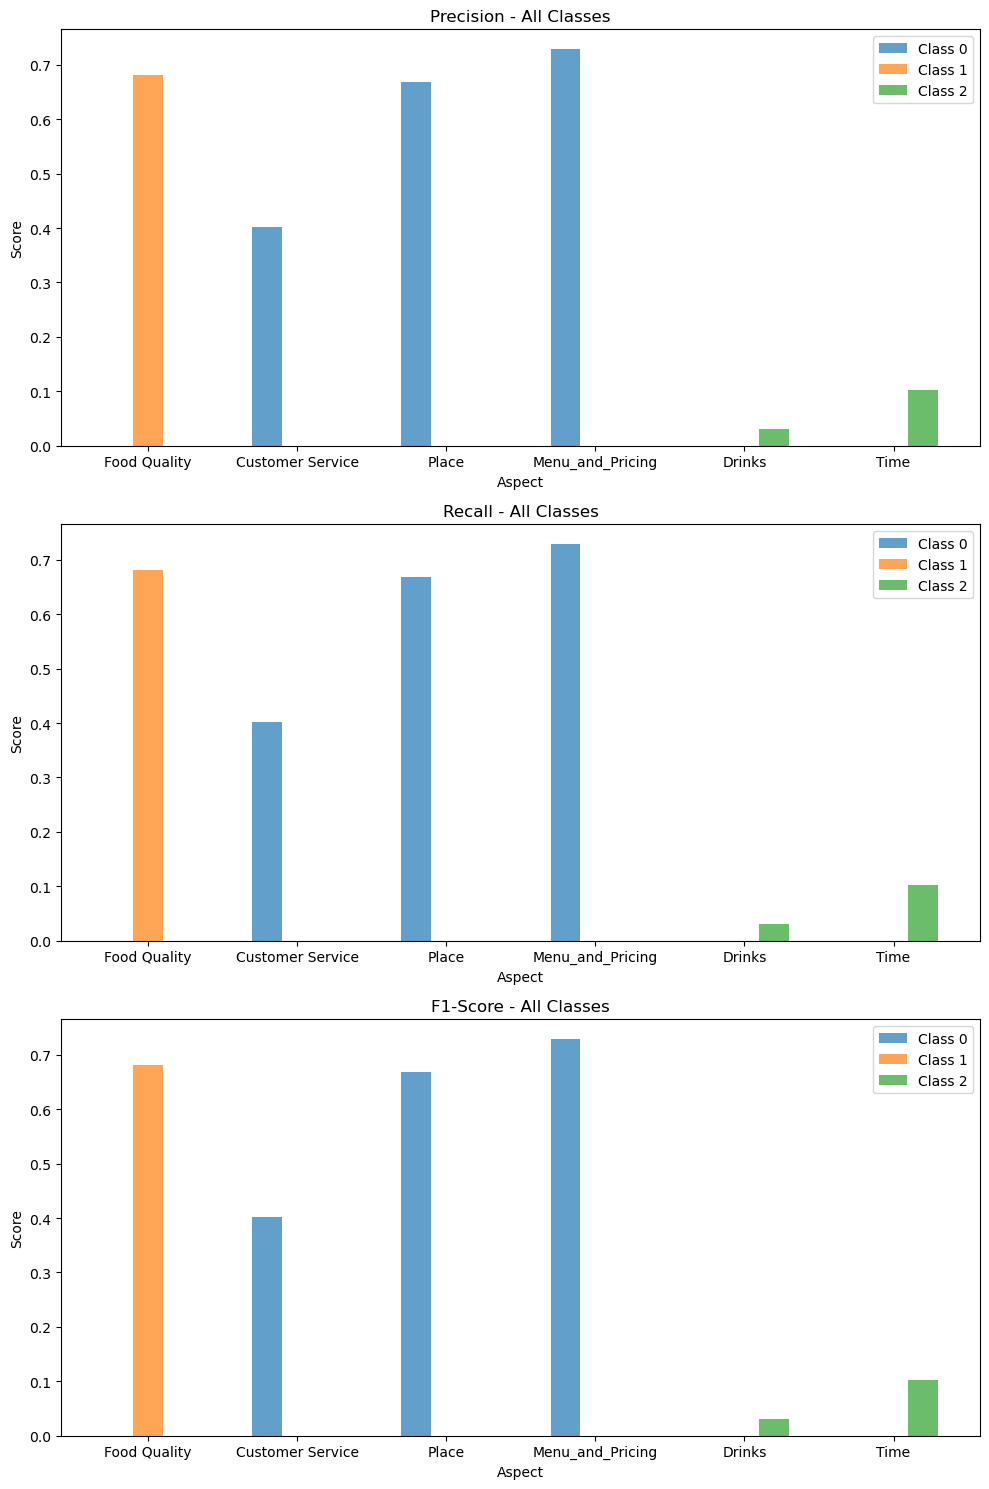

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

delimiter = ','

# Read the data file
try:
    yelp_data = pd.read_csv('/Users/urvilatnekar/Downloads/final_df_3040_labels.csv', delimiter=delimiter)
except pd.errors.ParserError as e:
    print(f"Error reading the data file: {e}")

X = yelp_data['text']
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)

# Create dictionaries to store precision, recall, and f1-score values for each aspect
precision_values = {}
recall_values = {}
f1_values = {}

# Iterate over each aspect and build a model
for aspect in aspects:
    y = yelp_data[aspect]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Tokenize and pad sequences
    tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_train)
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

    max_length = max(len(seq) for seq in X_train_sequences)
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

    # Apply oversampling
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_padded, y_train)

    # Convert labels to one-hot encoding
    y_train_resampled_one_hot = to_categorical(y_train_resampled, num_classes=3)
    y_test_one_hot = to_categorical(y_test, num_classes=3)

    # Build the RNN model
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),
        SimpleRNN(50, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Use softmax for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with resampled data
    model.fit(X_train_resampled, y_train_resampled_one_hot, epochs=5, validation_data=(X_test_padded, y_test_one_hot))

    # Evaluate the model
    predictions = np.argmax(model.predict(X_test_padded), axis=1)
    
    # Calculate precision, recall, and f1-score for each class
    precision = precision_score(np.argmax(y_test_one_hot, axis=1), predictions, average=None)
    recall = recall_score(np.argmax(y_test_one_hot, axis=1), predictions, average=None)
    f1 = f1_score(np.argmax(y_test_one_hot, axis=1), predictions, average=None)
    
    # Store values in the dictionaries
    precision_values[aspect] = precision
    recall_values[aspect] = recall
    f1_values[aspect] = f1

# Plotting bar graphs
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

bar_width = 0.2  # Adjust the width as needed

for i, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
    for class_index, class_name in enumerate([0, 1, 2]):  # Assuming you have three classes
        # Adjust the position of the bars for each class
        positions = np.arange(len(aspects)) + class_index * bar_width
        values = [precision_values[aspect][class_index] for aspect in aspects]
        axes[i].bar(positions, values, bar_width, alpha=0.7, label=f'Class {class_name}')

    axes[i].set_title(f'{metric} - All Classes')
    axes[i].set_xlabel('Aspect')
    axes[i].set_ylabel('Score')
    axes[i].set_xticks(np.arange(len(aspects)) + (len([0, 1, 2]) - 1) * bar_width / 2)
    axes[i].set_xticklabels(aspects)
    axes[i].legend()

plt.tight_layout()
plt.show()


### LSTM

This section tokenizes the text data and pads the sequences to ensure uniform length. Tokenization is performed using the Tokenizer class, and padding is done using pad_sequences. The maximum length of the sequences is determined by the longest sequence in the training data.

Oversampling is applied to handle imbalanced classes. Labels are then converted to one-hot encoding using to_categorical from Keras.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

delimiter = ','

# Read the data file
try:
    yelp_data = pd.read_csv('/Users/urvilatnekar/Downloads/final_df_3040_labels.csv', delimiter=delimiter)
except pd.errors.ParserError as e:
    print(f"Error reading the data file: {e}")

X = yelp_data['text']
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)

# Iterate over each aspect and build a model
for aspect in aspects:
    y = yelp_data[aspect]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Tokenize and pad sequences
    tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_train)
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

    max_length = max(len(seq) for seq in X_train_sequences)
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

    # Encode labels to one-hot vectors
    y_train_one_hot = to_categorical(y_train, num_classes=3)
    y_test_one_hot = to_categorical(y_test, num_classes=3)

    # Build the model
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),
        LSTM(100),
        Dense(3, activation='softmax')  # Change the output units to the number of classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_padded, y_train_one_hot, epochs=5, validation_data=(X_test_padded, y_test_one_hot))

    # Evaluate the model
    predictions = np.argmax(model.predict(X_test_padded), axis=1)
    print(f"\nClassification Report for {aspect}:")
    print(classification_report(np.argmax(y_test_one_hot, axis=1), predictions))
    print(f"Accuracy for {aspect}: {accuracy_score(np.argmax(y_test_one_hot, axis=1), predictions)}")


Epoch 1/5
15/15 [==============================] - 6s 367ms/step - loss: 0.8529 - accuracy: 0.7521 - val_loss: 0.8811 - val_accuracy: 0.7000
Epoch 2/5
15/15 [==============================] - 5s 354ms/step - loss: 0.6857 - accuracy: 0.7750 - val_loss: 0.8145 - val_accuracy: 0.7000
Epoch 3/5
15/15 [==============================] - 5s 355ms/step - loss: 0.6892 - accuracy: 0.7750 - val_loss: 0.8317 - val_accuracy: 0.7000
Epoch 4/5
15/15 [==============================] - 5s 360ms/step - loss: 0.6956 - accuracy: 0.7750 - val_loss: 0.8325 - val_accuracy: 0.7000
Epoch 5/5
4/4 [==============================] - 1s 97ms/step

Classification Report for Food Quality:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.70      1.00      0.82        84
           2       0.00      0.00      0.00        23

    accuracy                           0.70       120
   macro avg       0.23      0.33      0.27       120
weighte

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 6s 351ms/step - loss: 1.0218 - accuracy: 0.4208 - val_loss: 0.9743 - val_accuracy: 0.4417
Epoch 2/5
15/15 [==============================] - 5s 312ms/step - loss: 1.0044 - accuracy: 0.4125 - val_loss: 0.9918 - val_accuracy: 0.4417
Epoch 3/5
15/15 [==============================] - 5s 327ms/step - loss: 1.0006 - accuracy: 0.4521 - val_loss: 0.9761 - val_accuracy: 0.4417
Epoch 4/5
15/15 [==============================] - 5s 321ms/step - loss: 0.9962 - accuracy: 0.4354 - val_loss: 0.9745 - val_accuracy: 0.4417
Epoch 5/5
4/4 [==============================] - 0s 83ms/step

Classification Report for Customer Service:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        53
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        14

    accuracy                           0.44       120
   macro avg       0.15      0.33      0.20       120
weighted avg 

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 6s 348ms/step - loss: 0.8478 - accuracy: 0.7208 - val_loss: 0.6948 - val_accuracy: 0.7417
Epoch 2/5
15/15 [==============================] - 5s 319ms/step - loss: 0.7341 - accuracy: 0.7208 - val_loss: 0.6878 - val_accuracy: 0.7417
Epoch 3/5
15/15 [==============================] - 5s 321ms/step - loss: 0.7352 - accuracy: 0.7208 - val_loss: 0.6897 - val_accuracy: 0.7417
Epoch 4/5
15/15 [==============================] - 5s 314ms/step - loss: 0.7424 - accuracy: 0.7208 - val_loss: 0.6908 - val_accuracy: 0.7417
Epoch 5/5
4/4 [==============================] - 0s 84ms/step

Classification Report for Place:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        89
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00         5

    accuracy                           0.74       120
   macro avg       0.25      0.33      0.28       120
weighted avg       0.55 

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 5s 330ms/step - loss: 0.8773 - accuracy: 0.7229 - val_loss: 0.7425 - val_accuracy: 0.7500
Epoch 2/5
15/15 [==============================] - 5s 320ms/step - loss: 0.7037 - accuracy: 0.7646 - val_loss: 0.7530 - val_accuracy: 0.7500
Epoch 3/5
15/15 [==============================] - 5s 321ms/step - loss: 0.7024 - accuracy: 0.7646 - val_loss: 0.7497 - val_accuracy: 0.7500
Epoch 4/5
15/15 [==============================] - 5s 323ms/step - loss: 0.6977 - accuracy: 0.7667 - val_loss: 0.7485 - val_accuracy: 0.7500
Epoch 5/5
4/4 [==============================] - 0s 84ms/step

Classification Report for Menu_and_Pricing:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        90
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        15

    accuracy                           0.75       120
   macro avg       0.25      0.33      0.29       120
weighted avg 

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 5s 329ms/step - loss: 0.8253 - accuracy: 0.7521 - val_loss: 0.5741 - val_accuracy: 0.8000
Epoch 2/5
15/15 [==============================] - 5s 320ms/step - loss: 0.6112 - accuracy: 0.7854 - val_loss: 0.5455 - val_accuracy: 0.8000
Epoch 3/5
15/15 [==============================] - 5s 341ms/step - loss: 0.6049 - accuracy: 0.7854 - val_loss: 0.5397 - val_accuracy: 0.8000
Epoch 4/5
15/15 [==============================] - 5s 319ms/step - loss: 0.6029 - accuracy: 0.7854 - val_loss: 0.5520 - val_accuracy: 0.8000
Epoch 5/5
4/4 [==============================] - 0s 83ms/step

Classification Report for Drinks:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        96
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         1

    accuracy                           0.80       120
   macro avg       0.27      0.33      0.30       120
weighted avg       0.64

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 5s 338ms/step - loss: 0.7681 - accuracy: 0.7958 - val_loss: 0.6674 - val_accuracy: 0.8083
Epoch 2/5
15/15 [==============================] - 5s 320ms/step - loss: 0.5582 - accuracy: 0.8438 - val_loss: 0.6225 - val_accuracy: 0.8083
Epoch 3/5
15/15 [==============================] - 5s 328ms/step - loss: 0.5490 - accuracy: 0.8438 - val_loss: 0.6324 - val_accuracy: 0.8083
Epoch 4/5
15/15 [==============================] - 5s 316ms/step - loss: 0.5436 - accuracy: 0.8438 - val_loss: 0.6193 - val_accuracy: 0.8083
Epoch 5/5
4/4 [==============================] - 0s 84ms/step

Classification Report for Time:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        97
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         9

    accuracy                           0.81       120
   macro avg       0.27      0.33      0.30       120
weighted avg       0.65  

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using WORD2VEC embeddings

In [9]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the punkt tokenizer

# Tokenize the sentences into words
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in yelp_data['text']]

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained Word2Vec model
word2vec_model.save('word2vec_model.bin')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/urvilatnekar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from imblearn.over_sampling import RandomOverSampler
import numpy as np

def create_embedding_matrix(model, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, model.vector_size))
    for word, i in word_index.items():
        if word in model.wv:
            embedding_matrix[i] = model.wv[word]
    return embedding_matrix

delimiter = ','

# Read the data file
try:
    yelp_data = pd.read_csv('/Users/urvilatnekar/Downloads/final_df_3040_labels.csv', delimiter=delimiter)
except pd.errors.ParserError as e:
    print(f"Error reading the data file: {e}")

aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')

for aspect in aspects:
    X = yelp_data['text']
    y = yelp_data[aspect]

    # Get word index from the tokenizer
    tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
    tokenizer.fit_on_texts(X)

    # Tokenize and pad sequences
    X_sequences = tokenizer.texts_to_sequences(X)
    max_length = max(len(seq) for seq in X_sequences)
    X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

    # Apply oversampling
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X_padded, y)

    # Build the model with pre-trained Word2Vec embeddings
    embedding_matrix = create_embedding_matrix(word2vec_model, tokenizer.word_index)

    model = Sequential([
        Embedding(
            input_dim=len(tokenizer.word_index) + 1,
            output_dim=word2vec_model.vector_size,
            weights=[embedding_matrix],
            input_length=max_length,
            trainable=False  # Set to True if you want to fine-tune the embeddings
        ),
        LSTM(100),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model with resampled data
    model.fit(X_resampled, y_resampled, epochs=5, validation_split=0.2)

    # Evaluate the model
    predictions = (model.predict(X_padded) > 0.5).astype(int)
    print(f"\nClassification Report for {aspect}:")
    print(classification_report(y, predictions))
    print(f"Accuracy for {aspect}: {accuracy_score(y, predictions)}")


Epoch 1/5
158/158 [==============================] - 50s 315ms/step - loss: 0.0886 - accuracy: 0.1685 - val_loss: 9.1723e-04 - val_accuracy: 1.0000
Epoch 2/5
158/158 [==============================] - 48s 305ms/step - loss: 0.0161 - accuracy: 0.1669 - val_loss: 6.9095e-04 - val_accuracy: 1.0000
Epoch 3/5
158/158 [==============================] - 49s 307ms/step - loss: 0.0123 - accuracy: 0.1669 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/5
158/158 [==============================] - 48s 303ms/step - loss: 0.0157 - accuracy: 0.1669 - val_loss: 6.6384e-04 - val_accuracy: 1.0000
Epoch 5/5
96/96 [==============================] - 10s 100ms/step

Classification Report for Food Quality:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       424
         0.0       0.17      1.00      0.29       518
         1.0       1.00      0.00      0.00      2102

    accuracy                           0.17      3044
   macro avg       0.39      0.33

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
99/99 [==============================] - 30s 299ms/step - loss: 0.5741 - accuracy: 0.4051 - val_loss: -0.9746 - val_accuracy: 0.0493
Epoch 2/5
99/99 [==============================] - 30s 303ms/step - loss: 0.6086 - accuracy: 0.4041 - val_loss: -0.0917 - val_accuracy: 0.0493
Epoch 3/5
99/99 [==============================] - 32s 322ms/step - loss: 0.5539 - accuracy: 0.4047 - val_loss: -1.0506 - val_accuracy: 0.0493
Epoch 4/5
99/99 [==============================] - 35s 356ms/step - loss: 0.5515 - accuracy: 0.4047 - val_loss: -0.8101 - val_accuracy: 0.0493
Epoch 5/5
96/96 [==============================] - 9s 93ms/step

Classification Report for Customer Service:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       449
         0.0       0.42      1.00      0.59      1278
         1.0       1.00      0.00      0.00      1317

    accuracy                           0.42      3044
   macro avg       0.47      0.33      0.20    

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
153/153 [==============================] - 51s 328ms/step - loss: -4.2142 - accuracy: 0.4167 - val_loss: 26.8889 - val_accuracy: 0.0000e+00
Epoch 2/5
153/153 [==============================] - 46s 298ms/step - loss: -8.5283 - accuracy: 0.4167 - val_loss: 41.3590 - val_accuracy: 0.0000e+00
Epoch 3/5
153/153 [==============================] - 46s 300ms/step - loss: -12.2027 - accuracy: 0.4167 - val_loss: 55.9564 - val_accuracy: 0.0000e+00
Epoch 4/5
153/153 [==============================] - 46s 299ms/step - loss: -15.7711 - accuracy: 0.4167 - val_loss: 70.0794 - val_accuracy: 0.0000e+00
Epoch 5/5
96/96 [==============================] - 10s 105ms/step

Classification Report for Place:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       194
         0.0       0.67      1.00      0.80      2039
         1.0       0.00      0.00      0.00       811

    accuracy                           0.67      3044
   macro avg       0.22   

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
161/161 [==============================] - 60s 369ms/step - loss: -4.3408 - accuracy: 0.4167 - val_loss: 27.3175 - val_accuracy: 0.0000e+00
Epoch 2/5
161/161 [==============================] - 56s 350ms/step - loss: -8.6720 - accuracy: 0.4167 - val_loss: 41.9967 - val_accuracy: 0.0000e+00
Epoch 3/5
161/161 [==============================] - 52s 326ms/step - loss: -12.3369 - accuracy: 0.4167 - val_loss: 56.7330 - val_accuracy: 0.0000e+00
Epoch 4/5
161/161 [==============================] - 49s 301ms/step - loss: -15.9518 - accuracy: 0.4167 - val_loss: 71.1263 - val_accuracy: 0.0000e+00
Epoch 5/5
96/96 [==============================] - 9s 93ms/step

Classification Report for Menu_and_Pricing:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       270
         0.0       0.70      1.00      0.83      2138
         1.0       0.00      0.00      0.00       636

    accuracy                           0.70      3044
   macro avg     

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
182/182 [==============================] - 56s 303ms/step - loss: -4.3868 - accuracy: 0.4167 - val_loss: 28.2442 - val_accuracy: 0.0000e+00
Epoch 2/5
182/182 [==============================] - 62s 340ms/step - loss: -9.1716 - accuracy: 0.4167 - val_loss: 45.1777 - val_accuracy: 0.0000e+00
Epoch 3/5
182/182 [==============================] - 61s 336ms/step - loss: -13.3707 - accuracy: 0.4167 - val_loss: 61.9016 - val_accuracy: 0.0000e+00
Epoch 4/5
182/182 [==============================] - 60s 328ms/step - loss: -17.5139 - accuracy: 0.4167 - val_loss: 78.3554 - val_accuracy: 0.0000e+00
Epoch 5/5
96/96 [==============================] - 10s 98ms/step

Classification Report for Drinks:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        88
         0.0       0.80      1.00      0.89      2421
         1.0       0.00      0.00      0.00       535

    accuracy                           0.80      3044
   macro avg       0.27   

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5
185/185 [==============================] - 58s 309ms/step - loss: -4.2446 - accuracy: 0.4106 - val_loss: 28.4460 - val_accuracy: 0.0034
Epoch 2/5
185/185 [==============================] - 55s 297ms/step - loss: -9.3425 - accuracy: 0.4175 - val_loss: 45.8304 - val_accuracy: 0.0034
Epoch 3/5
185/185 [==============================] - 55s 298ms/step - loss: -13.6882 - accuracy: 0.4175 - val_loss: 62.9389 - val_accuracy: 0.0034
Epoch 4/5
185/185 [==============================] - 1098s 6s/step - loss: -17.9307 - accuracy: 0.4175 - val_loss: 79.5768 - val_accuracy: 0.0034
Epoch 5/5
96/96 [==============================] - 9s 94ms/step

Classification Report for Time:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       354
         0.0       0.81      1.00      0.89      2463
         1.0       1.00      0.00      0.01       227

    accuracy                           0.81      3044
   macro avg       0.60      0.33      0.30   

/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using GloVE embeddings

Epoch 1/5
127/127 [==============================] - 45s 344ms/step - loss: 1.0358 - sparse_categorical_accuracy: 0.4125 - val_loss: 1.5432 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
127/127 [==============================] - 38s 299ms/step - loss: 1.0323 - sparse_categorical_accuracy: 0.4153 - val_loss: 1.6389 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
127/127 [==============================] - 37s 295ms/step - loss: 1.0302 - sparse_categorical_accuracy: 0.4140 - val_loss: 1.6912 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
127/127 [==============================] - 38s 298ms/step - loss: 1.0303 - sparse_categorical_accuracy: 0.4163 - val_loss: 1.7651 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/5
20/20 [==============================] - 2s 89ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 24s 301ms/step - loss: 1.0404 - sparse_categorical_accuracy: 0.4047 - val_loss: 1.7983 - val_sparse_categorical_accuracy: 0.0160
Epoch 2/5
79/79 [==============================] - 23s 297ms/step - loss: 1.0353 - sparse_categorical_accuracy: 0.3979 - val_loss: 1.7600 - val_sparse_categorical_accuracy: 0.0160
Epoch 3/5
79/79 [==============================] - 24s 298ms/step - loss: 1.0343 - sparse_categorical_accuracy: 0.4159 - val_loss: 1.9425 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
79/79 [==============================] - 23s 295ms/step - loss: 1.0337 - sparse_categorical_accuracy: 0.4023 - val_loss: 1.6763 - val_sparse_categorical_accuracy: 0.0160
Epoch 5/5
20/20 [==============================] - 2s 90ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


123/123 [==============================] - 37s 299ms/step - loss: 1.0378 - sparse_categorical_accuracy: 0.4145 - val_loss: 1.8751 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
123/123 [==============================] - 36s 295ms/step - loss: 1.0289 - sparse_categorical_accuracy: 0.4137 - val_loss: 1.7058 - val_sparse_categorical_accuracy: 0.0031
Epoch 3/5
123/123 [==============================] - 36s 292ms/step - loss: 1.0294 - sparse_categorical_accuracy: 0.4193 - val_loss: 1.7980 - val_sparse_categorical_accuracy: 0.0031
Epoch 4/5
123/123 [==============================] - 36s 295ms/step - loss: 1.0301 - sparse_categorical_accuracy: 0.4012 - val_loss: 1.6766 - val_sparse_categorical_accuracy: 0.0031
Epoch 5/5
20/20 [==============================] - 2s 89ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


128/128 [==============================] - 38s 293ms/step - loss: 1.0373 - sparse_categorical_accuracy: 0.4076 - val_loss: 1.8344 - val_sparse_categorical_accuracy: 0.0039
Epoch 2/5
128/128 [==============================] - 38s 296ms/step - loss: 1.0556 - sparse_categorical_accuracy: 0.4180 - val_loss: 1.9827 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
128/128 [==============================] - 38s 294ms/step - loss: 1.0294 - sparse_categorical_accuracy: 0.4172 - val_loss: 1.7749 - val_sparse_categorical_accuracy: 9.8328e-04
Epoch 4/5
128/128 [==============================] - 38s 299ms/step - loss: 1.0289 - sparse_categorical_accuracy: 0.4157 - val_loss: 1.8152 - val_sparse_categorical_accuracy: 9.8328e-04
Epoch 5/5
20/20 [==============================] - 2s 105ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


145/145 [==============================] - 44s 299ms/step - loss: 1.0374 - sparse_categorical_accuracy: 0.4184 - val_loss: 1.7116 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
145/145 [==============================] - 42s 290ms/step - loss: 1.0313 - sparse_categorical_accuracy: 0.4171 - val_loss: 1.8293 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
145/145 [==============================] - 43s 294ms/step - loss: 1.0296 - sparse_categorical_accuracy: 0.4204 - val_loss: 1.7244 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
145/145 [==============================] - 44s 302ms/step - loss: 1.0301 - sparse_categorical_accuracy: 0.4031 - val_loss: 1.7806 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/5
20/20 [==============================] - 2s 90ms/step
Epoch 1/5


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


147/147 [==============================] - 45s 301ms/step - loss: 1.0352 - sparse_categorical_accuracy: 0.4084 - val_loss: 1.6301 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
147/147 [==============================] - 44s 298ms/step - loss: 1.0308 - sparse_categorical_accuracy: 0.4123 - val_loss: 1.7606 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
147/147 [==============================] - 61s 415ms/step - loss: 1.0315 - sparse_categorical_accuracy: 0.4093 - val_loss: 1.7338 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
147/147 [==============================] - 45s 307ms/step - loss: 1.0298 - sparse_categorical_accuracy: 0.4231 - val_loss: 1.8620 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/5
20/20 [==============================] - 4s 90ms/step


/Users/urvilatnekar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


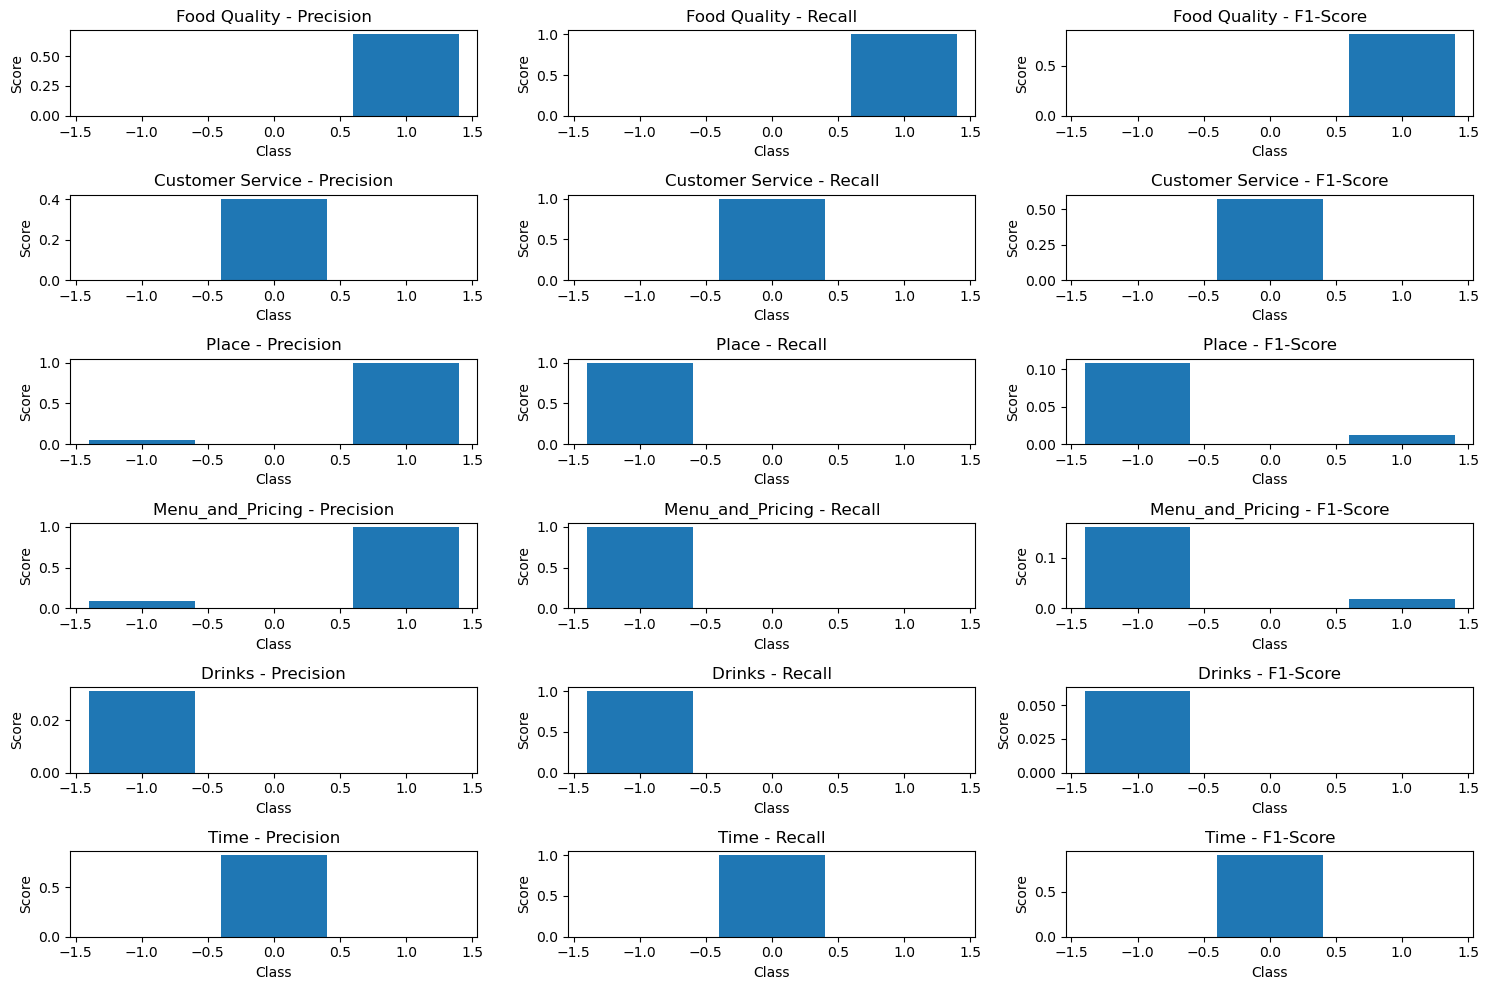

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt

# Load GLOVE embeddings into a dictionary
glove_path = '/Users/urvilatnekar/Downloads/Code 2/notebooks/glove.6B.100d.txt'
embedding_dim = 100

embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Read the data file
yelp_data = pd.read_csv('/Users/urvilatnekar/Downloads/final_df_3040_labels.csv', delimiter=',')

X = yelp_data['text']
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)

# Create dictionaries to store precision, recall, and f1-score values for each aspect
precision_values = {}
recall_values = {}
f1_values = {}

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, padding='post', truncating='post')

# Iterate over each aspect and build a model
for aspect in aspects:
    y = yelp_data[aspect]

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

    # Apply oversampling to the training set
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Create embedding matrix
    word_index = tokenizer.word_index
    num_words = min(5000, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i < num_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    # Build the model with GLOVE embeddings
    model = Sequential([
        Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=X_padded.shape[1], trainable=False),
        LSTM(100),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

    # Train the model with resampled data
    model.fit(X_train_resampled, y_train_resampled, epochs=5, validation_split=0.2)

    # Evaluate the model
    predictions = np.argmax(model.predict(X_test), axis=1)
    
    # Calculate precision, recall, and f1-score for each class
    precision = precision_score(y_test, predictions, average=None)
    recall = recall_score(y_test, predictions, average=None)
    f1 = f1_score(y_test, predictions, average=None)
    
    # Store values in the dictionaries
    precision_values[aspect] = precision
    recall_values[aspect] = recall
    f1_values[aspect] = f1

# Plotting bar graphs
fig, axes = plt.subplots(nrows=len(aspects), ncols=3, figsize=(15, 10))

for i, aspect in enumerate(aspects):
    # Plot precision
    axes[i, 0].bar(label_encoder.classes_, precision_values[aspect])
    axes[i, 0].set_title(f'{aspect} - Precision')
    axes[i, 0].set_xlabel('Class')
    axes[i, 0].set_ylabel('Score')
    
    # Plot recall
    axes[i, 1].bar(label_encoder.classes_, recall_values[aspect])
    axes[i, 1].set_title(f'{aspect} - Recall')
    axes[i, 1].set_xlabel('Class')
    axes[i, 1].set_ylabel('Score')
    
    # Plot f1-score
    axes[i, 2].bar(label_encoder.classes_, f1_values[aspect])
    axes[i, 2].set_title(f'{aspect} - F1-Score')
    axes[i, 2].set_xlabel('Class')
    axes[i, 2].set_ylabel('Score')

plt.tight_layout()
plt.show()


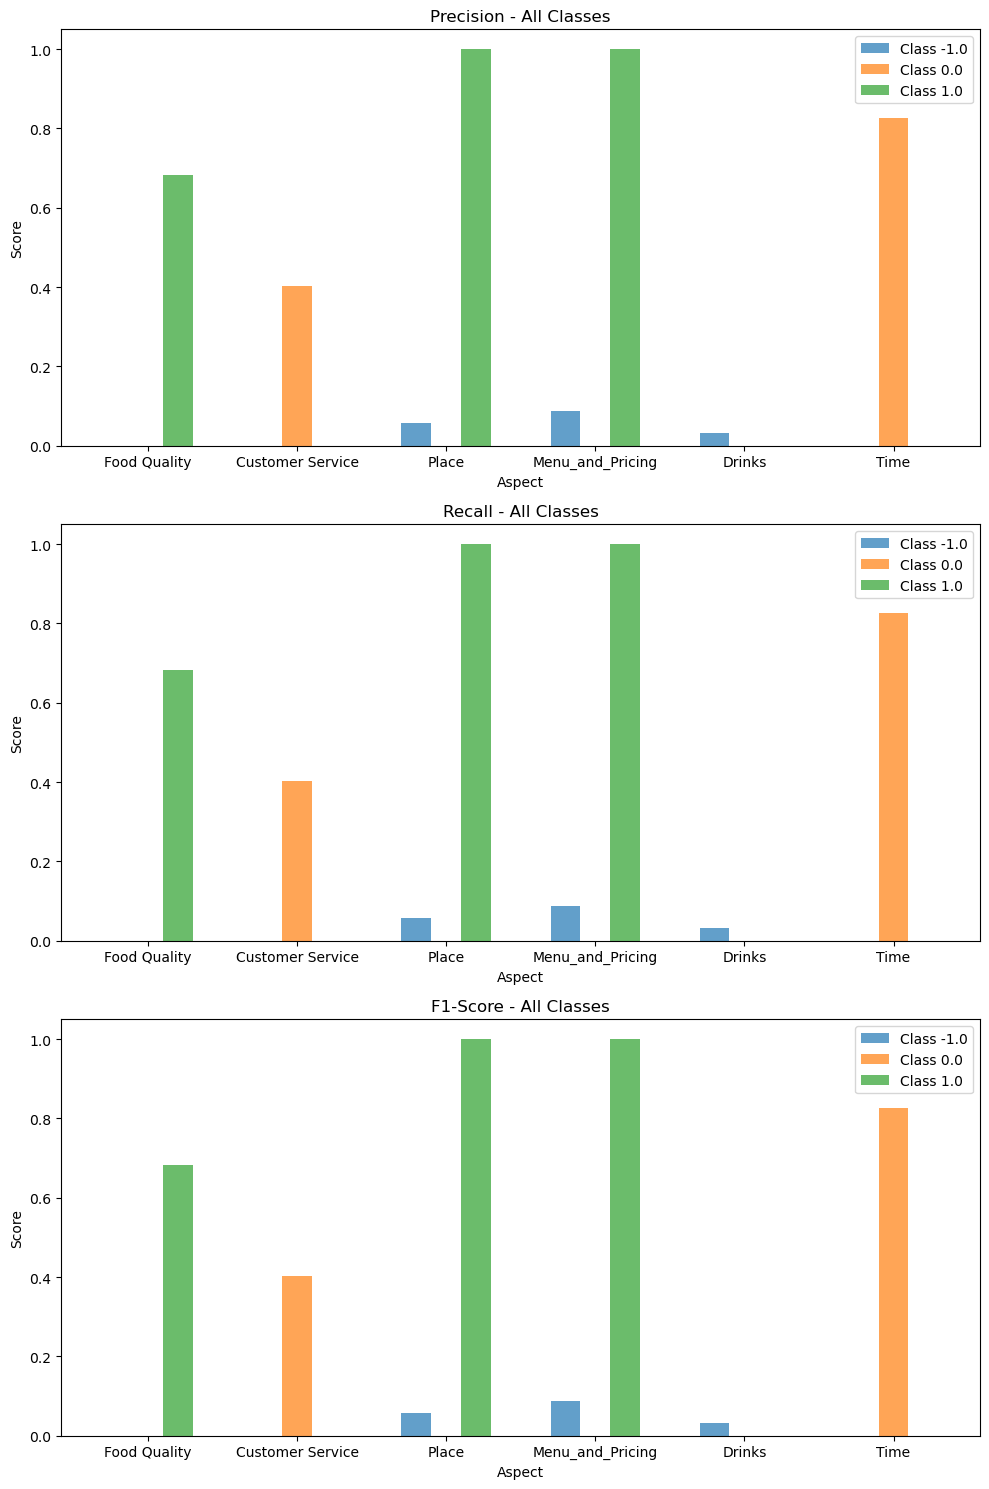

In [29]:
# Plotting bar graphs
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

bar_width = 0.2  # Adjust the width as needed

for i, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
    for class_index, class_name in enumerate(label_encoder.classes_):
        # Adjust the position of the bars for each class
        positions = np.arange(len(aspects)) + class_index * bar_width
        values = [precision_values[aspect][class_index] for aspect in aspects]
        axes[i].bar(positions, values, bar_width, alpha=0.7, label=f'Class {class_name}')

    axes[i].set_title(f'{metric} - All Classes')
    axes[i].set_xlabel('Aspect')
    axes[i].set_ylabel('Score')
    axes[i].set_xticks(np.arange(len(aspects)) + (len(label_encoder.classes_) - 1) * bar_width / 2)
    axes[i].set_xticklabels(aspects)
    axes[i].legend()

plt.tight_layout()
plt.show()
